In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sym
import math

In [85]:
archivo = open("Parabolico.csv")
datos = pd.read_csv(archivo,sep=',')
print(datos)

     X         Y
0  1.4  0.400795
1  3.5  0.594128
2  5.6  0.298028


In [86]:
X = np.float64(datos['X'])
Y = np.float64(datos['Y'])

In [87]:
def Metodo_Lagrange(x,xi,j):
    prod = 1.0
    n = len(xi)
    for i in range(n):
        if i != j:
            prod *= (x - xi[i])/(xi[j]-xi[i])  
    return prod

In [88]:
def Interpolacion_Lagrange(x,xi,yi):
    suma = 0.
    n = len(xi)
    for j in range(n):
        suma += yi[j]*Metodo_Lagrange(x,xi,j)
    return suma

In [89]:
#Trayectoria bala
x = np.linspace(X[0],X[-1],100)
y = Interpolacion_Lagrange(x,X,Y)


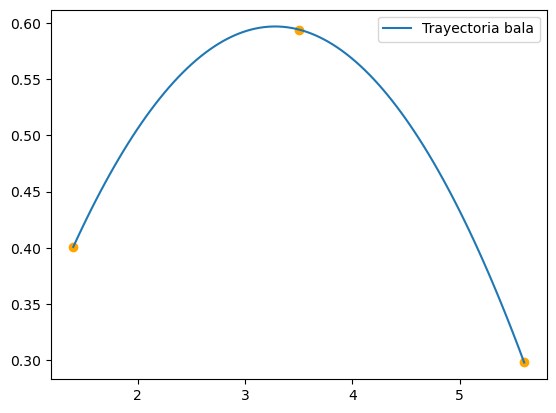

In [90]:
plt.plot(x,y,label="Trayectoria bala")
plt.scatter(X,Y,color="orange")
plt.legend(loc=0)
plt.show()

In [91]:
#Polinomio interpolador
x  = sym.Symbol('x')
f = Interpolacion_Lagrange(x,X,Y).expand()
f

-0.0554912422401579*x**2 + 0.363970234266202*x + 2.77555756156289e-17

In [134]:
x = sym.symbols('x') #Cambio de posición (xf - xo)
yo = sym.symbols('yo') #Altura inicial
theta = sym.symbols('theta')
vox = sym.symbols('vox') #velocidad inicial en x
g = -9.8
tan = sym.symbols('tan')
cos = sym.symbols('cos')

#Ecuación de la trayectoria

y = (g/((vox**2)*2)) + tan*theta*x + yo

y

tan*theta*x + yo - 4.9/vox**2

In [135]:
print("Tenemos que, a partir del polinomio interpolador, tan(theta) = 0.363970234266202, (g/((vo**2)*2)) = −0.0554912422401579 y 'yo' = 0.363970234266202")

Tenemos que, a partir del polinomio interpolador, tan(theta) = 0.363970234266202, (g/((vo**2)*2)) = −0.0554912422401579 y 'yo' = 0.363970234266202


In [127]:
#Hallamos la dirección despejando "theta" de tan(theta) = 0.363970234266202
theta_ = np.arctan(0.363970234266202)
theta__= round(math.degrees(theta_))

In [145]:
#Hallamos la magnitud despejando 'vox' de (g/((vox**2)*2)) = −0.0554912422401579
a = (-0.0554912422401579)
vox_2 = (g/(2*a)) 
vox = vox_2**(1/2)

9.396926207859085

In [148]:
# con la ecuación "vo = vox/cos(theta)" podemos hallar el valor de 'vo' 

vo = vox/np.cos(theta_)
vo_ = round(vo)

10

In [154]:
vector_vo = (vo_,theta__) # =(Magnitud de vo, ángulo theta)

In [155]:
vector_vo

(10, 20)